In [1]:
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
import matplotlib.pyplot as plt

# Code `get_data()`

## Create _draft code_ in the notebook

In [3]:
# Where am I?
os.getcwd()

'/Users/trouni/code/trouni/batch-1809/04-Decision-Science/01-Project-Setup/data-olist_data_metric'

In [ ]:
import os
import pandas as pd

# Build relative path to csv folder
csv_path = '/home/vincent/code/vtmoreau/04-Decision-Sicence/01-Project-Setup/data-context-and-setup/data/csv' # Bad practice!
csv_path = '../data-context-and-setup/data/csv' # Mac OS / Ubuntu only
csv_path = '..\\data-context-and-setup\\data\\csv' # Windows only
csv_path = os.path.join('..', 'data-context-and-setup','data','csv') # Robust to Linux/OS/Windows variations

# '/Users/trouni/code/lewagon/olist/data/csv'

In [ ]:
file_names = [f for f in os.listdir(csv_path) if f.endswith('.csv')]
file_names

In [ ]:
data = {}

for file_name in file_names:
    key_name = file_name.replace('olist_','').replace('_dataset','').replace('.csv','')
    data[key_name] = pd.read_csv(os.path.join(csv_path, file_name))

data['orders'].head()

## Transfer logic to `olist/data.py` 🐍

When you call a function that you will name `get_data` from `olist/data.py`, it should return the dictionary `data`:with key/value pairs `"name of the dataset":"dataset.csv"`

```python
from olist.data import Olist
Olist().get_data()
```
- Take your time to understand what happens when calling `Olist().get_data()`
- Your method `get_data()` needs to be callable from various places (e.g your Terminal, this notebook, another notebook located elsewhere, etc...)
- You can't use a relative path this time as the current working directory `os.getcwd()` depends on where you run the code in the first place


In [4]:
# Test your code
from olist.data import Olist
Olist().get_data().keys()

dict_keys(['sellers', 'product_category_name_translation', 'orders', 'order_items', 'customers', 'geolocation', 'order_payments', 'order_reviews', 'products'])

# Let's build a business metric: `Weekly Sales` 📈

<img src="https://wagon-public-datasets.s3.amazonaws.com/04-Decision-Science/01-Project-Setup/olist_schema_v2.png" width=1000>

**Goal**: Plot the weekly sum of `payment_value` for delivered orders

1️⃣ **Step 1**: Pseudo code your process in English below before actually coding

1. Take every order from the `orders` table 
2. Filter to keep only delivered ones using the `order_status`
3. Merge the `order_payments` to `orders` table
4. (Optional) Only keep the `order_purchase_timestamp` and `payment_value` columns
5. Group the `order_purchase_timestamp` by week
6. Sum (aggregate) the payment values

2️⃣ **Step 2**: Code your logic

In [5]:
data = Olist().get_data()
orders = data['orders'].copy()
order_payments = data['order_payments'].copy()

In [6]:
payments_df = orders.query("order_status == 'delivered'") \
                    .merge(order_payments, on="order_id") \
                    [['order_purchase_timestamp', 'payment_value']]
payments_df.head()

,order_purchase_timestamp,payment_value
0,2017-10-02 10:56:33,18.12
1,2017-10-02 10:56:33,2.00
2,2017-10-02 10:56:33,18.59
3,2018-07-24 20:41:37,141.46
4,2018-08-08 08:38:49,179.12


⌛️ Do not forget to handle `datetime` properly.

In [7]:
payments_df.order_purchase_timestamp = pd.to_datetime(payments_df.order_purchase_timestamp)
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100756 entries, 0 to 100755
Data columns (total 2 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_purchase_timestamp  100756 non-null  datetime64[ns]
 1   payment_value             100756 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.3 MB


In [8]:
payments_df = payments_df.set_index('order_purchase_timestamp')
payments_df

,payment_value
order_purchase_timestamp,
2017-10-02 10:56:33,18.12
2017-10-02 10:56:33,2.00
2017-10-02 10:56:33,18.59
2018-07-24 20:41:37,141.46
2018-08-08 08:38:49,179.12
...,...
2017-03-09 09:54:05,85.08
2018-02-06 12:58:58,195.00
2017-08-27 14:46:43,271.01


In [9]:
weekly_payments_df = payments_df.resample('W').sum()
weekly_payments_df.head()

,payment_value
order_purchase_timestamp,
2016-10-09,42669.98
2016-10-16,3896.73
2016-10-23,0.00
2016-10-30,0.00
2016-11-06,0.00


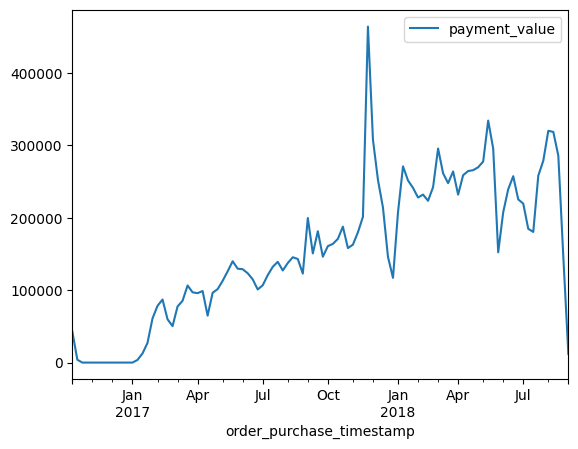

In [10]:
weekly_payments_df.plot();

<AxesSubplot:xlabel='order_purchase_timestamp'>

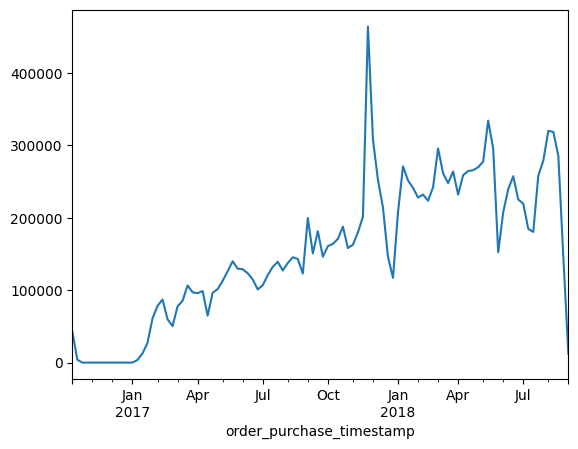

In [11]:
orders.order_purchase_timestamp = pd.to_datetime(orders.order_purchase_timestamp)

# BONUS: As a one-liner (convert the timestamp to a datetime in the `orders` first)
orders.query("order_status == 'delivered'") \
      .merge(order_payments, on="order_id") \
      .set_index('order_purchase_timestamp') \
      .resample('W') \
      .sum() \
      .payment_value \
      .plot()

👉 Set the `order_purchase_timestamp` as the index

In [ ]:
# YOUR CODE HERE

👉 You can now resample this dataset to compute metrics on a weekly basis.

In [ ]:
# YOUR CODE HERE

📈 Plot the weekly payment values to get a big picture of Olist's revenues.

In [ ]:
# YOUR CODE HERE